In [31]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [32]:
df = pd.read_csv('countries.csv')
df.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:

df.shape

(1704, 3)

In [35]:
df_52 = df.loc[df['year'] == 1952]

In [36]:
df_07 = df.loc[df['year'] == 2007]

In [37]:
df_07.head()

,country,year,population
11,Afghanistan,2007,31889923
23,Albania,2007,3600523
35,Algeria,2007,33333216
47,Angola,2007,12420476
59,Argentina,2007,40301927


In [38]:
pop_growth = df_52.merge(df_07,left_on='country', right_on='country')

In [39]:
pop_growth.head()

,country,year_x,population_x,year_y,population_y
0,Afghanistan,1952,8425333,2007,31889923
1,Albania,1952,1282697,2007,3600523
2,Algeria,1952,9279525,2007,33333216
3,Angola,1952,4232095,2007,12420476
4,Argentina,1952,17876956,2007,40301927


In [40]:
pop_growth.drop(['year_x', 'year_y'],axis=1)

,country,population_x,population_y
0,Afghanistan,8425333,31889923
1,Albania,1282697,3600523
2,Algeria,9279525,33333216
3,Angola,4232095,12420476
4,Argentina,17876956,40301927
...,...,...,...
137,Vietnam,26246839,85262356
138,West Bank and Gaza,1030585,4018332
139,"Yemen, Rep.",4963829,22211743
140,Zambia,2672000,11746035


In [41]:
pop_growth.rename(columns={'population_x' : 'population_52', 'population_y' : 'population_07'},inplace=True)

In [42]:
pop_growth.head()

,country,year_x,population_52,year_y,population_07
0,Afghanistan,1952,8425333,2007,31889923
1,Albania,1952,1282697,2007,3600523
2,Algeria,1952,9279525,2007,33333216
3,Angola,1952,4232095,2007,12420476
4,Argentina,1952,17876956,2007,40301927


In [43]:
pop_growth = pop_growth.drop(['year_x', 'year_y'],axis=1)

In [44]:
pop_growth.head()

,country,population_52,population_07
0,Afghanistan,8425333,31889923
1,Albania,1282697,3600523
2,Algeria,9279525,33333216
3,Angola,4232095,12420476
4,Argentina,17876956,40301927


In [45]:
pop_growth['population_growth'] = pop_growth['population_07']-pop_growth['population_52']

In [46]:
pop_growth.head()

,country,population_52,population_07,population_growth
0,Afghanistan,8425333,31889923,23464590
1,Albania,1282697,3600523,2317826
2,Algeria,9279525,33333216,24053691
3,Angola,4232095,12420476,8188381
4,Argentina,17876956,40301927,22424971


In [67]:
pop_growth = pop_growth.sort_values('population_growth', ascending=False).head(10)
pop_growth.head(10)

,country,population_52,population_07,population_growth
0,China,556263527,1318683096,762419569
1,India,372000000,1110396331,738396331
2,United States,157553000,301139947,143586947
3,Indonesia,82052000,223547000,141495000
4,Brazil,56602560,190010647,133408087
5,Pakistan,41346560,169270617,127924057
6,Bangladesh,46886859,150448339,103561480
7,Nigeria,33119096,135031164,101912068
8,Mexico,30144317,108700891,78556574
9,Philippines,22438691,91077287,68638596


In [68]:
pop_growth.head()

,country,population_52,population_07,population_growth
0,China,556263527,1318683096,762419569
1,India,372000000,1110396331,738396331
2,United States,157553000,301139947,143586947
3,Indonesia,82052000,223547000,141495000
4,Brazil,56602560,190010647,133408087


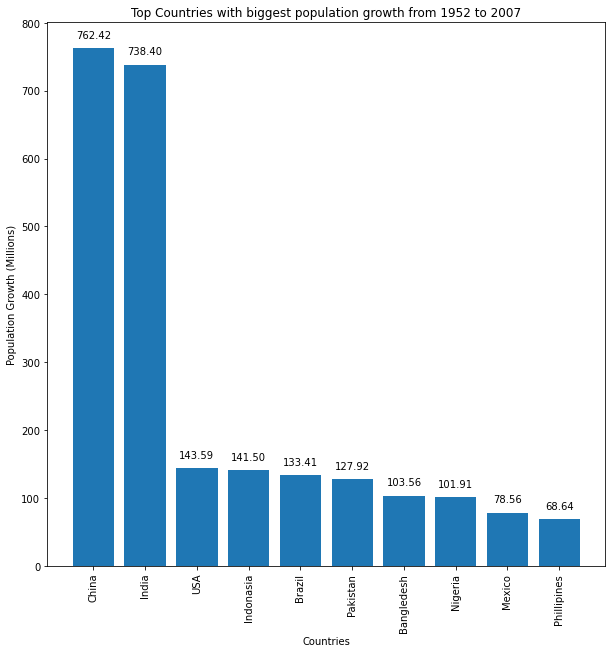

In [72]:
names = ['China', 'India', 'USA', 'Indonasia', 'Brazil', 'Pakistan', 'Bangledesh', 'Nigeria', 'Mexico', 'Phillipines']
pop_grow = pop_growth['population_growth']/10**6

plt.figure(figsize=(10,10))
plt.bar(names, pop_grow)
plt.title('Top Countries with biggest population growth from 1952 to 2007')
plt.xlabel('Countries')
plt.ylabel('Population Growth (Millions)')
plt.xticks(rotation=90)

for x,y in zip(names, pop_grow):
    label = '{:.2f}'.format(y)
    plt.annotate(label, (x,y), textcoords = 'offset points', xytext=(0,10), ha='center')
plt.show()